# Analysis

In [2]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [502]:
sns.set(rc={'figure.figsize':(10,7)})
plt.style.use('seaborn-whitegrid')

In [503]:
year = 'model_old'

## Data preparation

In [504]:
f = uproot.pandas.iterate("../outputs/"+year+"/trees/*.root", "t", reportpath = True,
                          branches=['beam_energy', 'mass', 'trigger', 'procedure'])

In [505]:
dataRAW = pd.concat([j.assign(name=float(re.findall(r"\d+\.\d+", path)[0])) for path,j in f])

In [506]:
dataRAW.sort_values(by='name', ascending=True, inplace=True);

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö `name` –≤ `data` –¥–æ–ª–∂–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ç–æ—á–µ–∫ –≤ —Å–µ–∑–æ–Ω–µ

* 11 –≥–æ–¥: 40 —Ç–æ—á–µ–∫
* 12 –≥–æ–¥: 16 —Ç–æ—á–µ–∫
* 17 –≥–æ–¥: 34 —Ç–æ—á–∫–∏
* 19 –≥–æ–¥: 44 —Ç–æ—á–∫–∏
* –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ: 38 —Ç–æ—á–µ–∫

In [507]:
print("Checking:", len(dataRAW.name.unique()), 'different names in', year, 'season')

Checking: 38 different names in model_old season


–ü—Ä–æ–≤–µ—Ä–∫–∞ —Ç–∏–ø–æ–≤ –ø–æ–ª–µ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

In [508]:
dataRAW.dtypes

beam_energy    float64
mass           float64
trigger          int32
procedure        int32
name           float64
dtype: object

–ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [509]:
dataRAW.describe()

beam_energy          mass       trigger     procedure          name
count  44490.000000  44490.000000  44490.000000  44490.000000  44490.000000
mean     769.736626    428.681215      3.754417      2.078872    769.736626
std      124.504193    171.688190      4.512496      0.588772    124.504193
min      550.000000     -1.000000     -1.000000      1.000000    550.000000
25%      662.500000    487.798431      0.000000      2.000000    662.500000
50%      800.000000    495.572540      1.000000      2.000000    800.000000
75%      862.500000    501.189049     10.000000      2.000000    862.500000
max     1000.000000    577.089233     10.000000      3.000000   1000.000000

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —Ç—Ä–∏–≥–≥–µ—Ä

In [510]:
bad_trig = dataRAW.query('trigger<0')
print('Energy points with bad trigger:\n', bad_trig.name.value_counts())

Energy points with bad trigger:
 825.0     202
837.5     201
862.5     197
850.0     183
812.5     178
550.0     157
787.5     156
562.5     152
800.0     152
875.0     151
575.0     138
587.5     138
887.5     131
600.0     126
612.5     122
775.0     121
762.5     117
625.0     100
900.0      99
912.5      97
737.5      93
650.0      93
637.5      92
750.0      92
712.5      81
662.5      81
687.5      77
925.0      76
700.0      76
675.0      70
725.0      66
935.0      64
945.0      52
950.0      51
962.5      48
975.0      47
987.5      37
1000.0     32
Name: name, dtype: int64


–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —ç–Ω–µ—Ä–≥–∏–∏

In [511]:
bad_en = dataRAW.query('beam_energy<0')
print('Bad energy records:', bad_en.name.shape[0])

Bad energy records: 0


–£–¥–∞–ª–∏—Ç—å —Å–æ–±—ã—Ç–∏—è —Å –ø–ª–æ—Ö–∏–º —Ç—Ä–∏–≥–≥–µ—Ä–æ–º –∏ —ç–Ω–µ—Ä–≥–∏—è–º–∏ (–Ω–µ –≤ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏)

In [512]:
data = dataRAW if 'model' in year else dataRAW.query('trigger>-1&beam_energy>0')

–û—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ –º–∞—Å—Å—ã –≤–Ω—É—Ç—Ä–∏ –æ–∫–Ω–∞ (450,550) –∏ –±–µ–∑ –ø—Ä–æ—Ü–µ–¥—É—Ä—ã kinfit

In [513]:
data = data.query('mass>450&mass<550&procedure!=1')

In [514]:
print(data.shape[0], 'records left')

38196 records left


–£–¥–∞–ª–∏—Ç—å –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã

In [515]:
data.drop('procedure', axis=1, inplace=True)

/home/nikitap/programs/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [516]:
data.head()

beam_energy        mass  trigger   name
2204        550.0  505.468781        0  550.0
1487        550.0  499.550446        0  550.0
1486        550.0  504.252960        0  550.0
1485        550.0  494.820343        0  550.0
1484        550.0  498.473419        0  550.0

–î–æ–±–∞–≤–∏—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏

In [517]:
lum = pd.read_csv(f'../inputs/{year}/lum.dat')
lum.rename({'label': 'name'}, axis=1, inplace=True)
if 'err' in lum.columns:
    lum.drop(['err'], axis=1, inplace=True) #–æ—à–∏–±–∫–∞ —Å–≤–µ—Ç–∏–º–æ—Å—Ç–µ–π —É—Ö–æ–¥–∏—Ç –≤ —Å–∏—Å—Ç–µ–º–∞—Ç–∏–∫—É
    
lum = lum.sort_values(by='name')

In [518]:
lum.tail()

name   lum
33   950.0  5294
34   962.5  4667
35   975.0  4113
36   987.5  3640
37  1000.0  3361

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–∞–Ω–Ω—ã–µ (—Ö–æ—Ä–æ—à–æ, –µ—Å–ª–∏ —á–∏—Å–ª–∞ —Å–æ–≤–ø–∞–¥–∞—é—Ç)

–ï—Å–ª–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç, —Ç–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã

In [519]:
print('Records in  lum:', lum.shape[0])
print('Records in data:', data.name.unique().shape[0])

Records in  lum: 38
Records in data: 38


–û–±—ä–µ–¥–∏–Ω–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ —Å–≤–µ—Ç–∏–º–æ—Å—Ç—å

In [520]:
data_prep = lum.merge(data, on='name')

In [521]:
def check_foo(data1, data2):
    if(data1.shape[0] == data2.shape[0]):
        print("Good.", data1.shape[0], 'rows' )
    else:
        print("WARNING. frames haven't equal shape |", data1.shape[0], 'vs', data2.shape[0], 'records')
    return

In [522]:
check_foo(data_prep, data)

Good. 38196 rows


–°–º–æ—Ç—Ä–∏–º, –≤ –∫–∞–∫–∏—Ö –∏–º–µ–Ω–Ω–æ —Ç–æ—á–∫–∞—Ö –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç `data` –∏ `lum`

In [523]:
set1 = set(data.name.unique())
set2 = set(lum.name.unique())

(set1|set2).difference(set1&set2)

set()

### Pictures

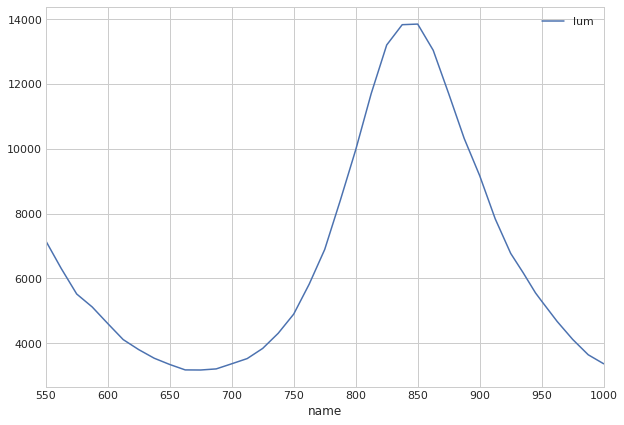

In [524]:
lum.plot(x='name', y='lum')

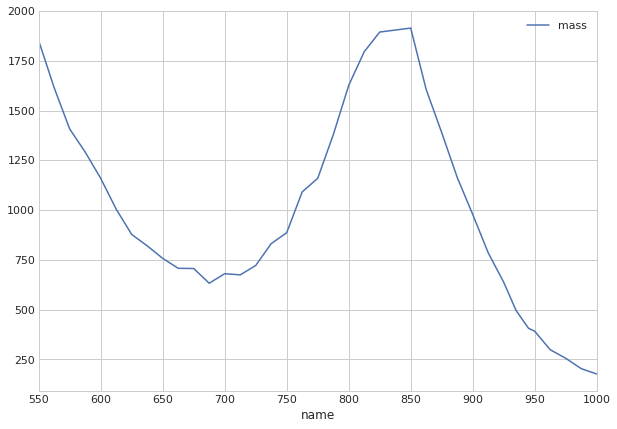

In [525]:
data_prep.groupby('name').agg({'mass':np.size}).plot()

In [526]:
data_prep.groupby('name').agg({'mass':np.size})

mass
name          
550.0   1851.0
562.5   1615.0
575.0   1408.0
587.5   1292.0
600.0   1160.0
612.5   1005.0
625.0    878.0
637.5    821.0
650.0    758.0
662.5    708.0
675.0    707.0
687.5    633.0
700.0    681.0
712.5    675.0
725.0    722.0
737.5    832.0
750.0    887.0
762.5   1092.0
775.0   1160.0
787.5   1378.0
800.0   1627.0
812.5   1796.0
825.0   1895.0
837.5   1905.0
850.0   1915.0
862.5   1606.0
875.0   1390.0
887.5   1165.0
900.0    979.0
912.5    786.0
925.0    638.0
935.0    496.0
945.0    407.0
950.0    392.0
962.5    299.0
975.0    256.0
987.5    204.0
1000.0   177.0

–°–ª–∏—è–Ω–∏–µ —Ç–æ—á–µ–∫

In [527]:
cnct = []
if year=='11':
    cnct = [([875., 887.5], 880), ([900., 912.5, 925.], 910), ([935., 945., 950., 962.5, 975., 987.5, 1000.], 950)] #11year
if year=='12':
    cnct = [([900., 920., 936., 950., 960., 970., 980., 990], 960)] #12 year
if year=='17':
    cnct = [([880., 890., 900., 910.], 900), ([920., 930., 936., 937.5], 935),
            ([937.4, 938.3, 938.9], 938), ([939.6, 940.2, 940.8], 940),
            ([942., 950., 960., 971.], 960), ([981., 990, 1003.5],990)] #17 year
if year=='19':
    cnct = [([862.5, 875.0, 887.5, 900.0, 912.5, 925], 875),([936, 945.0, 950.0, 951.1, 955.0, 962.5], 955),
            ([975., 978.0, 987.5], 980)] #19year

In [528]:
for c in cnct:
    data_prep.name.replace(c[0], c[1], inplace=True)

OK, points have been merged

In [529]:
data_prep.tail()

name   lum  beam_energy        mass  trigger
38191  1000.0  3361       1000.0  488.678284       -1
38192  1000.0  3361       1000.0  502.696716       10
38193  1000.0  3361       1000.0  482.546844        0
38194  1000.0  3361       1000.0  489.826843        9
38195  1000.0  3361       1000.0  495.701385        0

In [530]:
check_foo(data_prep, data)

Good. 38196 rows


### –ü–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏ –≤ —Å–ª–∏—Ç—ã—Ö —Ç–æ—á–∫–∞—Ö

In [531]:
data_prep['lume'] = data_prep.beam_energy*data_prep.lum

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å —Å–ª–∏—è–Ω–∏—è

In [532]:
#—á–∏—Å–ª–æ –≤ –ø–æ–ª–µ lum —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ —Å–ø–∏—Å–∫–µ –¥–ª—è —Å–ª–∏—è–Ω–∏—è
data_prep[['lum', 'name']].\
drop_duplicates(subset=['name','lum']).groupby('name').agg({'lum':np.size}).query('lum!=1')

Empty DataFrame
Columns: [lum]
Index: []

In [533]:
new_lum = data_prep[['beam_energy', 'lum', 'lume', 'name']].drop_duplicates(subset=['lum','name']).\
groupby('name').agg({'lume':[np.sum], 'lum':[np.sum], 'beam_energy':[np.min, np.max]})

In [534]:
new_lum.shape

(38, 4)

In [535]:
new_lum['Emean'] = np.round( new_lum[('lume','sum')]/new_lum[('lum','sum')], 2)

In [536]:
new_lum.columns = ['lume', 'lum', 'dEmin', 'dEmax', 'Emean']
new_lum.drop('lume', axis=1, inplace=True)
new_lum['dEmax'] = np.abs( np.round( new_lum.dEmax-new_lum.Emean, 2) )
new_lum['dEmin'] = np.abs( np.round( new_lum.Emean - new_lum.dEmin, 2) )

In [537]:
#data.loc[641.].beam_energy.std()

In [538]:
new_lum.query('dEmin>0')

Empty DataFrame
Columns: [lum, dEmin, dEmax, Emean]
Index: []

I have got new luminosity table.

Now I should join it to existing table

In [539]:
data_prep.drop(['lume', 'lum', 'beam_energy'], axis=1, inplace=True)

In [540]:
final_data = data_prep.join(new_lum, how='inner', on='name')

In [541]:
check_foo(final_data, data_prep)

Good. 38196 rows


That is good. Now I should do the analysis

In [542]:
final_data.tail()

name        mass  trigger   lum  dEmin  dEmax   Emean
38191  1000.0  488.678284       -1  3361    0.0    0.0  1000.0
38192  1000.0  502.696716       10  3361    0.0    0.0  1000.0
38193  1000.0  482.546844        0  3361    0.0    0.0  1000.0
38194  1000.0  489.826843        9  3361    0.0    0.0  1000.0
38195  1000.0  495.701385        0  3361    0.0    0.0  1000.0

----------------
## Fit

In [543]:
data2 = final_data.groupby('name')

In [544]:
dic = {}
for i in data2.groups:
    print(i)
    dic[i] = np.array( data2.get_group(i)['mass'] )

550.0
562.5
575.0
587.5
600.0
612.5
625.0
637.5
650.0
662.5
675.0
687.5
700.0
712.5
725.0
737.5
750.0
762.5
775.0
787.5
800.0
812.5
825.0
837.5
850.0
862.5
875.0
887.5
900.0
912.5
925.0
935.0
945.0
950.0
962.5
975.0
987.5
1000.0


In [545]:
import iminuit
import probfit as pf

In [546]:
plt.rcParams.update({'font.size': 18, 'figure.figsize':(16,9)})

In [547]:
mass_bound = (450, 550)

In [548]:
#2 –≥–∞—É—Å—Å–∞
def constant(x):
    return 1
def two_gauss(x, mu, sigma1, sigma2, frac):
    return frac*pf.gaussian(x, mu, sigma1) + (1-frac)*pf.gaussian(x, mu, sigma2)

norm_sig = pf.rename( pf.Normalized( two_gauss, mass_bound ), ['x', 'M', '$\sigma1$', '$\sigma2$', 'f'] )
norm_bkg = pf.Normalized( constant, mass_bound )

ext_sig = pf.Extended(norm_sig, extname='$N_{sig}$')
ext_bkg = pf.Extended(norm_bkg, extname='$N_{bkg}$')

pdf = pf.AddPdf(ext_sig, ext_bkg)

sigma1Lim = (5.43, 5.10)
sigma2Lim = (12.68, 0)
MLim = (497.299, 5.098)
fLim = (1, 0)

# 11: ùúé1=(4.49, 0.27) , ùúé2=(10.1, 1.), ùëì=(0.68, 0.07), M=(497.299, 0.098)
# 12: ùúé1=(5.26, 0.30) , ùúé2=(14.42, 3.87), ùëì=(0.86, 0.06), M=(498.33, 0.27)
# mod_old: ùúé1=(5.43, 0.10) , ùúé2=(12.68, 0.25), ùëì=(0.58, 0.02), M=(497.05, 0.04)

limits = {
    "limit_M": [MLim[0]-MLim[1], MLim[0]+MLim[1]],
    "limit_$\sigma1$": [sigma1Lim[0] - sigma1Lim[1], sigma1Lim[0] + sigma1Lim[1]],
    "limit_$\sigma2$": [sigma2Lim[0] - sigma2Lim[1], sigma2Lim[0] + sigma2Lim[1]],
    "limit_$N_{sig}$": [0, 100000],
    "limit_$N_{bkg}$": [0, 2000],
    "limit_f": [fLim[0]-fLim[1], fLim[0]+fLim[1]]
}
errors = {
    "error_M": 1,
    "error_$\sigma1$": 0.1,
    "error_$\sigma2$": 0.,
    "error_$N_{sig}$": 0.3,
    "error_$N_{bkg}$": 0.1,
    "error_f": 0.05
}

# norm_sig1 = pf.Normalized( pf.rename(pf.gaussian, ['x', 'm', '$\sigma1$']), mass_bound)
# norm_sig2 = pf.Normalized( pf.rename(pf.gaussian, ['x', 'm', '$\sigma2$']), mass_bound)
# norm_bkg = pf.Extended(norm_bkg, extname='$N_{bkg}$')

# gauss1 = pf.Extended(norm_sig1, extname='$N_{sig1}$')
# gauss2 = pf.Extended(norm_sig2, extname='$N_{sig2}$')

# pdf = pf.AddPdf(gauss1, gauss2, norm_bkg)
pf.describe(pdf)

# limits = {"limit_m": [497.6, 497.6], "limit_$\sigma1$": [4.26, 4.26], "limit_$\sigma2$": [11.16, 11.16],  
#           "limit_$N_{sig1}$": [0, 10000], "limit_$N_{sig2}$": [0, 10000], "limit_$N_{bkg}$": [0, 1000]}
# errors = {"error_m": 1, "error_$\sigma1$": 0., "error_$\sigma2$": 0. , 
#           "error_$N_{sig1}$": 0.3, "error_$N_{sig2}$": 0.3, "error_$N_{bkg}$":0}

['x', 'M', '$\\sigma1$', '$\\sigma2$', 'f', '$N_{sig}$', '$N_{bkg}$']

In [549]:
def fitter(dic, nbins, energy, binnedLik=False, simple_plot=True):
    
    likelihood = pf.UnbinnedLH(pdf, dic, extended=True, extended_bound=mass_bound) if not(binnedLik) else \
    pf.BinnedLH(pdf, dic, int(nbins*(mass_bound[1]-mass_bound[0])/100.), bound=mass_bound, extended=True)
    
    initial_par_values = {"M": 497.6, "$\sigma1$": 4.26, "$N_{sig}$": np.size(dic),
                          "$\sigma2$": 11.16, "f": 0.5, "$N_{bkg}$": 1}
    mt = iminuit.Minuit(likelihood, **initial_par_values, **errors, **limits, pedantic=False)
    mt.migrad();
        
    if simple_plot:
        likelihood.draw(minuit=mt) if binnedLik else likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound)
    else:
        fig = plt.figure(figsize=(16, 10), dpi= 80)
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

        # Define the axes
        ax_main = fig.add_subplot(grid[:-1, :])

        if binnedLik:
            likelihood.draw(minuit=mt)
        else:
            likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound)

        plt.tick_params(labelsize=20);
        plt.xlabel('invariant mass, MeV', fontsize=20)
        plt.ylabel('number of events', fontsize=20)

        # this is an inset axes over the main axes
        ax_bottom = fig.add_subplot(grid[-1, :], xticklabels=[])
        likelihood.draw_residual(minuit=mt) if binnedLik else \
        likelihood.draw_residual(minuit=mt, bins=nbins, bound=mass_bound)
    
        plt.savefig(f'../outputs/{year}/figures/fit_e{energy}.png')
    return mt, likelihood

In [550]:
itr = iter(dic)

In [551]:
fit_frame = pd.DataFrame(columns=[ 'M', 'S1', 'S2', 'f', 'N', 'C', 
                                  'Merr', 'S1err', 'S2err', 'ferr', 'Nerr', 'Cerr'])

In [629]:
i = next(itr)
print('Label:', i)

Label: 1000.0


Migrad quality: True
Real: 177 Found: 177.00032947838073


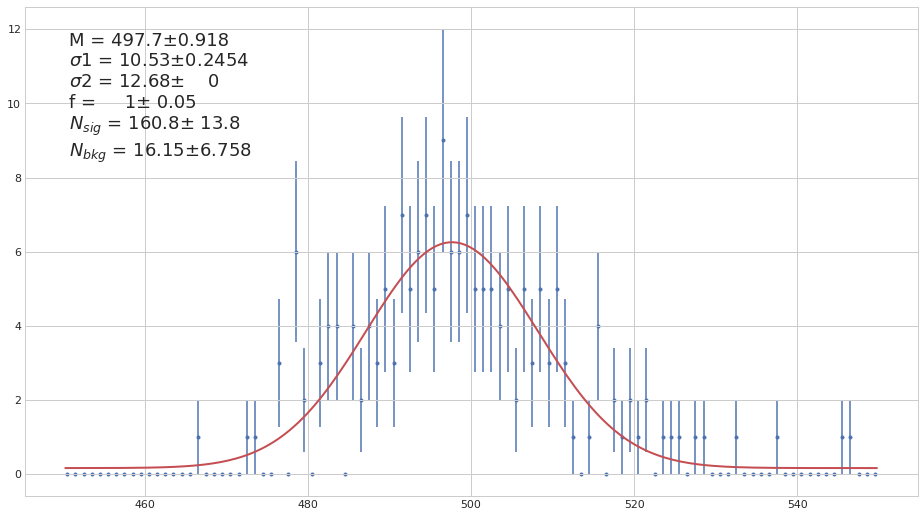

In [630]:
#mass_bound = (450, 550)
dicx = dic[i]#final_data.mass.values#dic[i]#
mt, lik = fitter(dicx, 100, i, False, True)
fit_frame.loc[i] = mt.values.values() + mt.errors.values()
print("Migrad quality:", mt.migrad_ok())
print( 'Real:', np.size(dicx), 'Found:', mt.values['$N_{sig}$'] + mt.values['$N_{bkg}$'] )

In [557]:
fit_frame

M        S1     S2    f            N           C      Merr  \
550.0  496.573449  5.851739  12.68  1.0  1717.819541  132.977716  0.150478   
562.5  496.793035  6.394531  12.68  1.0  1497.609073  117.380679  0.176619   

          S1err  S2err  ferr       Nerr       Cerr  
550.0  0.134013    0.0  0.05  42.889934  15.957880  
562.5  0.159453    0.0  0.05  40.260453  15.506115

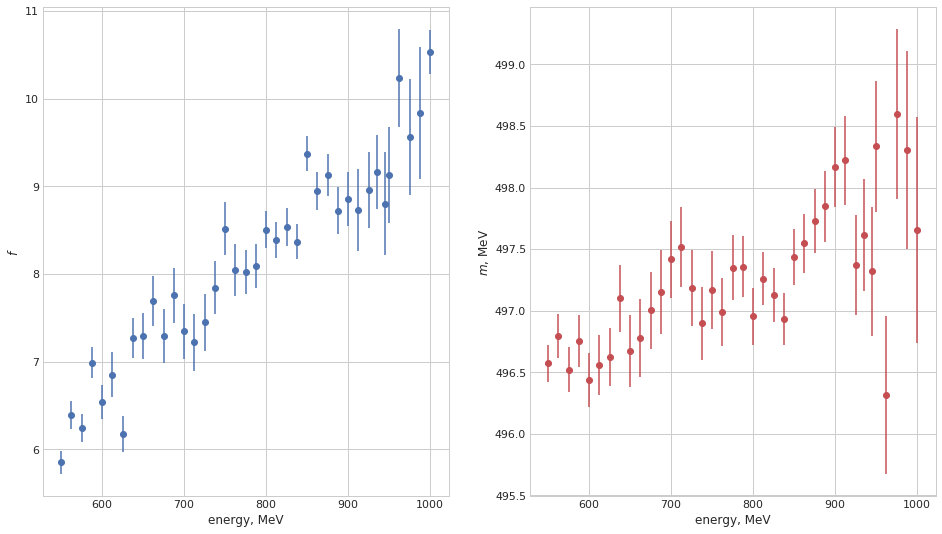

In [631]:
plt.subplot(1, 2, 1)
plt.errorbar(data=fit_frame, x=fit_frame.index, y='S1', yerr='S1err', fmt='o')
plt.xlabel('energy, MeV');
plt.ylabel('$f$');
plt.subplot(1, 2, 2)

plt.errorbar(x=fit_frame.index, y=fit_frame.M, yerr=fit_frame.Merr, fmt='or')
plt.xlabel('energy, MeV');
plt.ylabel('$m$, MeV');

### Some notes:
none

## –ê–Ω–∞–ª–∏–∑ $\sigma$

### 19 –≥–æ–¥

–í —Ç–æ—á–∫–∞—Ö 550 –∏ 550.1 –ø—Ä–∏–Ω—Ü–∏–ø–∏–∞–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è —à–∏—Ä–∏–Ω–∞ ( 4.8 vs 6.12 )

–í 19 –≥–æ–¥—É –≤–∑—è–ª –≥—Ä—É–ø–ø–∞–º–∏ —Ç–æ—á–∫–∏ –ø–æ —ç–Ω–µ—Ä–≥–∏–∏ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª –∏—Ö $\sigma$, –≤–∏–¥–Ω–æ, —á—Ç–æ —à–∏—Ä–∏–Ω–∞ —Ä–∞—Å—Ç—ë—Ç –≤–º–µ—Å—Ç–µ —Å —ç–Ω–µ—Ä–≥–∏–µ–π

In [634]:
np.round(fit_frame.S1err.values, 2)

array([0.13, 0.16, 0.16, 0.18, 0.19, 0.25, 0.21, 0.23, 0.26, 0.28, 0.31,
       0.31, 0.31, 0.32, 0.32, 0.3 , 0.31, 0.29, 0.25, 0.25, 0.21, 0.2 ,
       0.21, 0.2 , 0.2 , 0.21, 0.24, 0.27, 0.31, 0.47, 0.44, 0.42, 0.59,
       0.55, 0.56, 0.66, 0.75, 0.25])

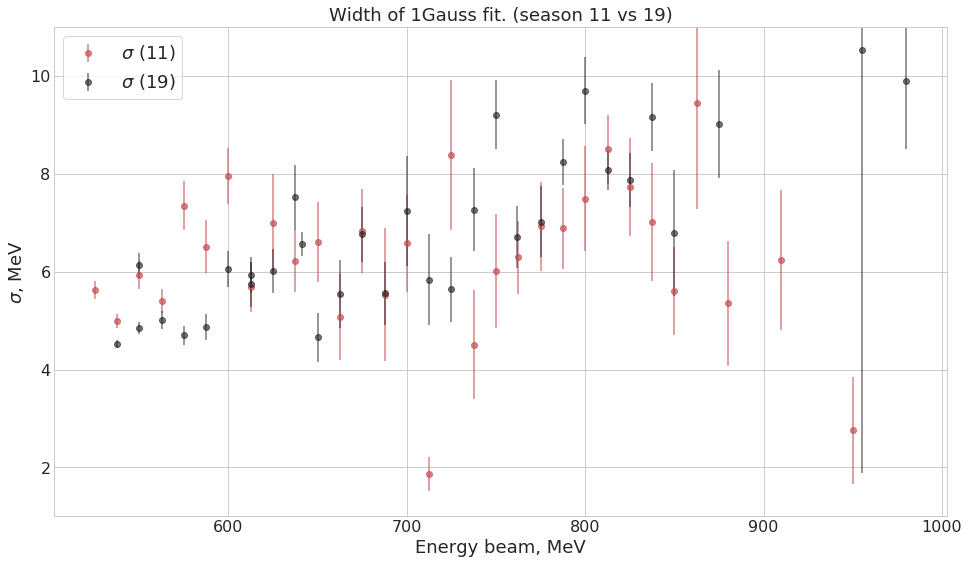

In [651]:
en19_an  = [537.5, 550. , 550.1, 562.5, 575. , 587.5, 600. , 612.5, 612.6,
       625. , 637.5, 641. , 650. , 662.5, 675. , 687.5, 700. , 712.5,
       725. , 737.5, 750. , 762. , 775. , 787.5, 800. , 812.5, 825. ,
       837.5, 850. , 875. , 955. , 980. ]
sigma19_an = [ 4.52,  4.85,  6.13,  5.01,  4.7 ,  4.87,  6.05,  5.74,  5.93,
        6.02,  7.52,  6.57,  4.66,  5.54,  6.76,  5.56,  7.24,  5.83,
        5.64,  7.27,  9.21,  6.71,  7.02,  8.25,  9.7 ,  8.08,  7.87,
        9.16,  6.79,  9.02, 10.53,  9.9 ]
dsigma19_an = [0.09, 0.13, 0.26, 0.18, 0.19, 0.26, 0.37, 0.46, 0.36, 0.45, 0.67,
       0.24, 0.5 , 0.69, 0.56, 0.64, 1.13, 0.93, 0.66, 0.84, 0.71, 0.63,
       0.73, 0.47, 0.69, 0.41, 0.55, 0.7 , 1.28, 1.1 , 8.64, 1.39]

enMC_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
sigmaMC_an = [5.5 , 5.87, 5.98, 6.3 , 6.23, 6.79, 6.33, 7.3 , 7.29, 7.54, 7.32,
       7.12, 7.39, 7.85, 7.59, 7.94, 7.64, 8.14, 7.99, 8.52, 8.4 , 8.44,
       8.51, 8.3 , 8.73, 8.77, 8.87, 8.3 , 8.95, 8.55, 9.21, 8.9 , 9.25,
       8.94, 9.4 , 9.67, 8.87, 8.95]
dsigmaMC_an = [0.12, 0.15, 0.17, 0.17, 0.21, 0.2 , 0.25, 0.29, 0.26, 0.34, 0.27,
       0.24, 0.32, 0.27, 0.33, 0.27, 0.23, 0.24, 0.23, 0.2 , 0.19, 0.18,
       0.15, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.23, 0.28, 0.24, 0.3 ,
       0.26, 0.29, 0.37, 0.36, 0.36]

enMCold_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
sigmaMCold_an = [ 5.85,  6.39,  6.24,  6.99,  6.54,  6.85,  6.17,  7.27,  7.29,
        7.7 ,  7.3 ,  7.76,  7.34,  7.22,  7.45,  7.84,  8.52,  8.05,
        8.02,  8.09,  8.5 ,  8.39,  8.54,  8.37,  9.37,  8.94,  9.12,
        8.72,  8.85,  8.73,  8.95,  9.16,  8.8 ,  9.12, 10.23,  9.56,
        9.83, 10.53]
dsigmaMCold_an = [0.13, 0.16, 0.16, 0.18, 0.19, 0.25, 0.21, 0.23, 0.26, 0.28, 0.31,
       0.31, 0.31, 0.32, 0.32, 0.3 , 0.31, 0.29, 0.25, 0.25, 0.21, 0.2 ,
       0.21, 0.2 , 0.2 , 0.21, 0.24, 0.27, 0.31, 0.47, 0.44, 0.42, 0.59,
       0.55, 0.56, 0.66, 0.75, 0.25]

en11_an = [525. , 537.5, 550. , 562.5, 575. , 587.5, 600. , 612.5, 625. ,
       637.5, 650. , 662.5, 675. , 687.5, 700. , 712.5, 725. , 737.5,
       750. , 762.5, 775. , 787.5, 800. , 812.5, 825. , 837.5, 850. ,
       862.5, 880. , 910. , 950. ]
sigma11_an = [5.63, 4.99, 5.93, 5.4 , 7.35, 6.51, 7.95, 5.69, 6.99, 6.22, 6.6 ,
       5.07, 6.83, 5.53, 6.58, 1.87, 8.38, 4.51, 6.01, 6.29, 6.93, 6.89,
       7.49, 8.5 , 7.73, 7.02, 5.61, 9.45, 5.35, 6.24, 2.76]
dsigma11_an = [0.18, 0.15, 0.28, 0.25, 0.5 , 0.54, 0.57, 0.51, 1.01, 0.63, 0.82,
       0.88, 0.85, 1.36, 0.99, 0.35, 1.53, 1.12, 1.16, 0.74, 0.91, 0.83,
       1.07, 0.7 , 1.01, 1.21, 0.9 , 2.16, 1.27, 1.43, 1.09]

df_sigma_an = pd.DataFrame({'emin':emin_an, 'emax':emax_an, 'sigma':sigma_an, 'ds': dsigma_an})
df_sigma_an['emean'] = (df_sigma_an.emin + df_sigma_an.emax)/2.
df_sigma_an['deup'] = df_sigma_an.emean - df_sigma_an.emin
# plt.errorbar(x=enMC_an, y=sigmaMC_an, yerr=dsigmaMC_an, fmt='o', alpha=0.8, label='$\sigma$ (MC)')
# plt.errorbar(x=enMCold_an, y=sigmaMCold_an, yerr=dsigmaMCold_an, alpha=0.8, fmt='oc', label='$\sigma$ (MC_old)')
plt.errorbar(x=en11_an, y=sigma11_an, yerr=dsigma11_an, fmt='or', alpha=0.7, label='$\sigma$ (11)')
plt.errorbar(x=en19_an, y=sigma19_an, yerr=dsigma19_an, fmt='ok', alpha=0.6, label='$\sigma$ (19)')
plt.legend(fontsize=18, frameon=True);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.ylim(1, 11)
plt.xlabel('Energy beam, MeV', fontsize=18);
plt.ylabel('$\sigma$, MeV', fontsize=18);
plt.title('Width of 1Gauss fit. (season 11 vs 19)', fontsize=18);
plt.savefig('sigma3.pdf')

–í–æ–∑–Ω–∏–∫–∞–µ—Ç –≥–∏–ø–æ—Ç–µ–∑–∞ (–µ—â—ë –∏ —Å —É—á—ë—Ç–æ–º —Ç–æ–≥–æ —Ñ–∞–∫—Ç–∞, —á—Ç–æ –Ω–∞ –±–æ–ª—å—à–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ –¥–∞–Ω–Ω—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ) –¥–æ–±–∞–≤–∏—Ç—å –µ—â—ë –æ–¥–∏–Ω –≥–∞—É—Å—Å. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –∏–∑ —ç—Ç–æ–≥–æ –≤—ã–π–¥–µ—Ç.

–ü–æ–≤—Ç–æ—Ä—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∏–≥–º –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å –∫–∞—Ä—Ç–∏–Ω–∫–æ–π –≤—ã—à–µ

<ErrorbarContainer object of 3 artists>

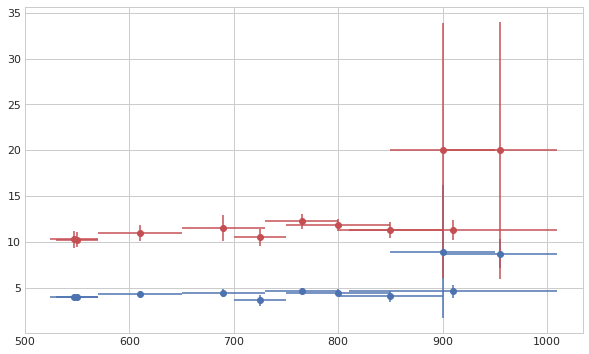

In [552]:
plt.rcParams.update({'font.size': 18, 'figure.figsize':(10,6)})
emin_an  = [524, 570, 650, 730, 800, 900, 850, 750, 700, 530, 810]
emax_an  = [570, 650, 730, 800, 900, 1010, 950, 850, 750, 570, 1010]
sigma1_an = [4.02, 4.31, 4.44, 4.66, 4.08, 8.724847949065675, 8.952093654550044, 4.509152675111134, 3.6841658856535178, 4.01709961911671, 4.628942053127934]
dsigma1_an = [0.13, 0.18, 0.44, 0.39, 0.55, 1.590062670581002, 7.270944904440277, 0.3453623743108212, 0.6048651400716212, 0.1190920659859942, 0.7016815273028718]
sigma2_an = [10.3, 10.98, 11.55, 12.25, 11.34, 19.995900427431625, 19.999882612152, 11.866375420268561, 10.53279261428423, 10.283255759137344, 11.339313291171166]
dsigma2_an = [0.9, 0.85, 1.42, 0.81, 0.89, 13.996992016425061, 13.933962567163773, 0.6617076556061905, 0.9474962757272731, 0.8289418695468278, 1.1023824322696134]
frac12_an = [3.92, 2.31, 1.76, 0.88, 0.64, 2.728843351319719, 6.911293728105318, 0.8379169741736125, 0.7006647553677061, 3.9196405944377877, 0.62839843050261]
df_sigma_an = pd.DataFrame({'emin':emin_an, 'emax':emax_an, 'sigma1':sigma1_an, 'ds1': dsigma1_an, 
                            'sigma2':sigma2_an, 'ds2': dsigma2_an, 'frac': frac12_an})
df_sigma_an['emean'] = (df_sigma_an.emin + df_sigma_an.emax)/2.
df_sigma_an['deup'] = df_sigma_an.emean - df_sigma_an.emin
plt.errorbar(data=df_sigma_an, x='emean', y='sigma1', xerr='deup', yerr='ds1', fmt='ob')
plt.errorbar(data=df_sigma_an, x='emean', y='sigma2', xerr='deup', yerr='ds2', fmt='or')

–í–∏–¥–Ω–æ, —á—Ç–æ –∫–∞–∂–¥–∞—è –∏–∑ —Å–∏–≥–º –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ —Å–¥–≤–∏–≥–∞–µ—Ç—Å—è. –ù–æ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ –º–∞–ª–æ–º –æ–±—ä—ë–º–µ –¥–∞–Ω–Ω—ã—Ö —à–∏—Ä–∏–Ω—ã –Ω–∞—á–∏–Ω–∞—é—Ç —Ä–∞—Å–ø–ª—ã–≤–∞—Ç—å—Å—è (–∑–∞–º–µ—Ç–Ω–æ –ø—Ä–∏ –≤—ã—Å–æ–∫–∏—Ö —ç–Ω–µ—Ä–≥–∏—è—Ö)

–ó–∞—Ñ–∏–∫—Å–∏—Ä—É—é —à–∏—Ä–∏–Ω—ã –Ω–∞ —Å—Ä–µ–¥–Ω–∏—Ö –±–µ–∑ —É—á—ë—Ç–∞ –≤—ã–ø–∞–≤—à–∏—Ö —Ç–æ—á–µ–∫

In [238]:
print('Sigma1:', df_sigma_an.drop([5,6]).sigma1.mean() )
print('Sigma2:', df_sigma_an.drop([5,6]).sigma2.mean() )

Sigma1: 4.261040025889923
Sigma2: 11.160193009429035


–¢–æ–≥–¥–∞ –ø—Ä–æ–≤–µ—Ä—è—é –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ $\sigma$ –≤ —Å–ª—É—á–∞–µ –æ–¥–Ω–æ–≥–æ –≥–∞—É—Å—Å–∞ –º–µ–Ω—è–µ—Ç—Å—è –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –º–µ–Ω—è–µ—Ç—Å—è –¥–æ–ª—è —Å–æ–±—ã—Ç–∏–π –ø–æ–¥ —É–∑–∫–∏–º –∏ —à–∏—Ä–æ–∫–∏–º –≥–∞—É—Å—Å–∞–º–∏ –º–µ–Ω—è–µ—Ç—Å—è —Å —ç–Ω–µ—Ä–≥–∏–µ–π

<ErrorbarContainer object of 3 artists>

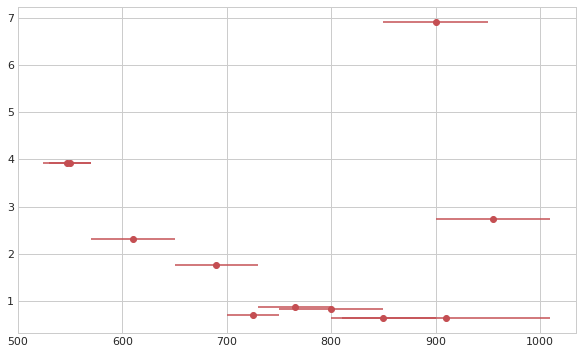

In [314]:
plt.errorbar(data=df_sigma_an, x='emean', y='frac', xerr='deup', fmt='or')

–¢–µ–ø–µ—Ä—å 2 –≥–∞—É—Å—Å–∞ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è (`model_new`)

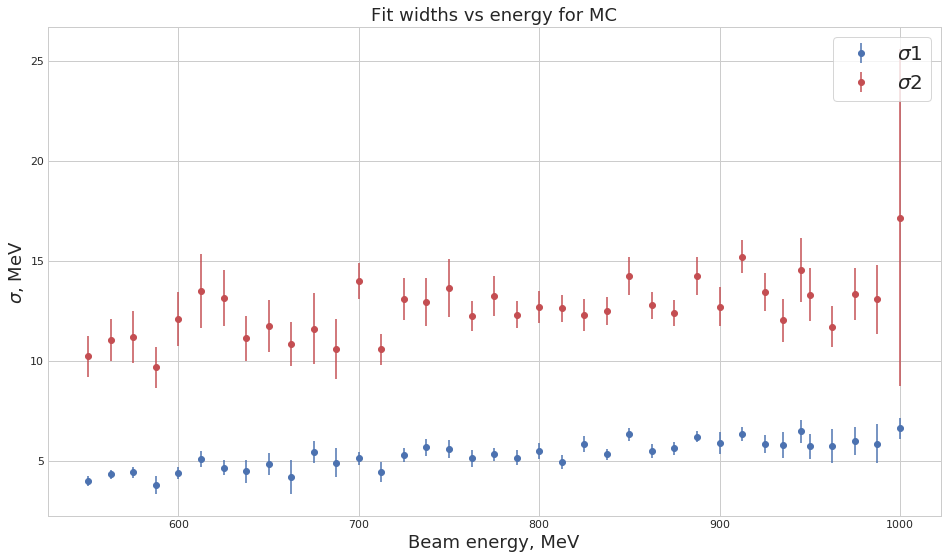

In [194]:
en_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
s1_an = [4.00928888, 4.33747255, 4.43559649, 3.803059  , 4.423181  ,
       5.1014904 , 4.66565474, 4.5045961 , 4.87810257, 4.1960529 ,
       5.43876272, 4.91843674, 5.14132747, 4.45975828, 5.31429813,
       5.69505078, 5.60314509, 5.14196975, 5.3540354 , 5.16952826,
       5.50877517, 4.94773543, 5.86872395, 5.33462472, 6.33305366,
       5.50748813, 5.64094449, 6.22043922, 5.8916277 , 6.35738374,
       5.86313576, 5.82890009, 6.48632741, 5.73844622, 5.75707775,
       6.0104084 , 5.87187928, 6.64138695]
s2_an = [10.24281036, 11.05319352, 11.18820377,  9.68060542, 12.08471558,
       13.48858781, 13.14961493, 11.13335416, 11.74951692, 10.83995468,
       11.62019776, 10.61195066, 13.99189698, 10.58376123, 13.09259816,
       12.95582443, 13.64101323, 12.22498239, 13.24488383, 12.3034521 ,
       12.69676957, 12.62291336, 12.27461984, 12.50987221, 14.22699406,
       12.77836884, 12.39655738, 14.23327043, 12.70892288, 15.21270754,
       13.44290652, 12.03170836, 14.54893378, 13.31082015, 11.72120822,
       13.3503376 , 13.0830581 , 17.15999921]
s1err_an = [0.24420247, 0.23628817, 0.2793554 , 0.43500637, 0.30562574,
       0.41426316, 0.36829545, 0.57240212, 0.55104936, 0.83858414,
       0.54760894, 0.72628265, 0.32523255, 0.51859386, 0.3644784 ,
       0.43592776, 0.44839775, 0.42269701, 0.32609865, 0.3645667 ,
       0.37670574, 0.36108701, 0.38803313, 0.29671017, 0.31075945,
       0.34238496, 0.33784375, 0.2866558 , 0.54865994, 0.35272085,
       0.43615359, 0.64643721, 0.55803832, 0.61537946, 0.86046785,
       0.71916831, 0.972075  , 0.51998215]
s2err_an = [1.02206463, 1.06032287, 1.28551181, 1.00666387, 1.33649728,
       1.83713476, 1.38658335, 1.13404142, 1.28373445, 1.08777375,
       1.78985585, 1.48944632, 0.89674085, 0.7724873 , 1.03681978,
       1.19733482, 1.46254629, 0.7502984 , 0.97471297, 0.6738531 ,
       0.78451445, 0.65602477, 0.80038106, 0.69198662, 0.94256228,
       0.66889848, 0.66153967, 0.94133285, 0.96653921, 0.84317584,
       0.94040895, 1.08274286, 1.57935263, 1.31951827, 1.03343693,
       1.29964889, 1.72233654, 8.39968307]
plt.errorbar(x=en_an, y=s1_an, yerr=s1err_an, fmt='ob', label='$\sigma1$')
plt.errorbar(x=en_an, y=s2_an, yerr=s2err_an, fmt='or', label='$\sigma2$')
plt.legend(frameon=True, fontsize=20);
plt.xlabel('Beam energy, MeV', fontsize=18);
plt.title('Fit widths vs energy for MC', fontsize=18)
plt.ylabel('$\sigma$, MeV', fontsize=18);
# plt.savefig('4.pdf')

–ü–æ —Å–∏–≥–º–µ –≤—Å—ë –±–æ–ª–µ–µ-–º–µ–Ω–µ–µ —Ö–æ—Ä–æ—à–æ, –∞ –≤–æ—Ç —Å–ª–µ–¥—É—é—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é —Å–æ–±—ã—Ç–∏–π –≤ –≥–∞—É—Å—Å–∞—Ö —Å–º—É—â–∞–µ—Ç.

–í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –∏–∑-–∑–∞ –∫–∞–∫–∏—Ö-—Ç–æ —Ä–∞–∑–Ω–æ–≥–ª–∞—Å–∏–π –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–µ—Ä–∏—Ç—å, –Ω–æ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ

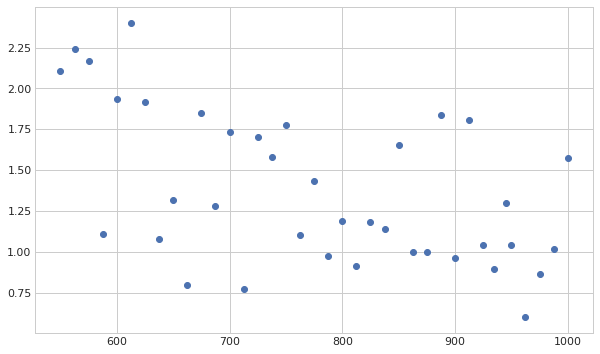

In [554]:
frac_an = [2.1047093 , 2.24281089, 2.16611316, 1.10671026, 1.93781416,
       2.39827954, 1.91504091, 1.07766751, 1.31920011, 0.79416602,
       1.84898383, 1.27802379, 1.73464467, 0.7721512 , 1.70095568,
       1.58280159, 1.77529039, 1.09981627, 1.43251272, 0.97705235,
       1.18825784, 0.9150671 , 1.18416207, 1.14115352, 1.6519543 ,
       0.99945712, 1.00099901, 1.83883042, 0.96433868, 1.8047252 ,
       1.04416522, 0.89545267, 1.29761692, 1.0409458 , 0.60057145,
       0.86444899, 1.01426618, 1.57182104]
plt.scatter(en_an, frac_an)

–°–º—É—â–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –≥–∞—É—Å—Å–æ–≤, –ø–æ—ç—Ç–æ–º—É –∑–∞—Ñ–∏–∫—Å–∏—Ä—É—é –≤—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≥–∞—É—Å—Å–æ–≤ –∏–∑ –ø–æ–ª–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:

$\sigma_1 = 4.178 \pm 0.096$ , $\sigma_2 = 11.06 \pm 0.42$, $ f = 0.67 \pm 0.02$

### 17 –≥–æ–¥

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –¥–∞—ë—Ç 
$\sigma_1 = 5.77 \pm 0.56$, $\sigma_2 = 13.44 \pm 2.12$, $f = 0.61 \pm 0.1 $, $M = 498.49 \pm 0.23$

### 11 –≥–æ–¥

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –¥–∞—ë—Ç $\sigma_1 = 4.49 \pm 0.27$ , $\sigma_2 = 10.1 \pm 1.$, $ f = 0.68 \pm 0.07$. 

–Ø –≤–∑—è–ª –¥–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Ä–∞–∑—Ä–µ—à–∏–ª –∏–º –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—à–∏–±–∫–∏

### 12 –≥–æ–¥

$\sigma_1 = 5.26 \pm 0.30$ , $\sigma_2 = 14.42 \pm 3.87$, $ f = 0.86 \pm 0.06$, $ M = 498.33 \pm 0.27$

### Model Old

$\sigma_1 = 5.43 \pm 0.10$ , $\sigma_2 = 12.68 \pm 0.25$, $ f = 0.58 \pm 0.02$, $ M = 497.05 \pm 0.04$

# Save fit info

In [175]:
fit_frame.to_csv(f'../outputs/{year}/tables/fit_frame.csv')

In [176]:
#mt.matrix(correlation=True)
#mt.draw_profile('Nsig');

In [177]:
dataN = fit_frame[['N','Nerr']]
dataN.columns = ['Nsig', 'dNsig']

In [178]:
dataN.tail()

Nsig      dNsig
950.0   367.299743  20.583194
962.5   284.861876  18.049730
975.0   241.803154  16.820747
987.5   181.455364  14.965278
1000.0  154.283417  14.426290

I have got table with events numbers

Now, I will get rid of m-field in the data table (because, I have used it)

In [179]:
data_info = final_data.drop_duplicates(['name','lum']).drop(['mass', 'trigger'], axis=1).set_index('name')

In [180]:
dataN = data_info.join(dataN, how='inner')
dataN

lum  dEmin  dEmax   Emean         Nsig      dNsig
name                                                       
550.0    7163    0.0    0.0   550.0  1831.236946  43.269959
562.5    6306    0.0    0.0   562.5  1582.495662  40.432597
575.0    5516    0.0    0.0   575.0  1387.568498  37.826418
587.5    5116    0.0    0.0   587.5  1276.300970  36.178258
600.0    4606    0.0    0.0   600.0  1126.567200  34.429073
612.5    4108    0.0    0.0   612.5   983.662227  32.020967
625.0    3799    0.0    0.0   625.0   864.431200  30.021147
637.5    3533    0.0    0.0   637.5   812.543718  28.826411
650.0    3340    0.0    0.0   650.0   733.937808  27.886360
662.5    3172    0.0    0.0   662.5   697.420412  28.047048
675.0    3169    0.0    0.0   675.0   682.470315  26.961355
687.5    3203    0.0    0.0   687.5   617.228066  25.640037
700.0    3361    0.0    0.0   700.0   670.257626  26.423765
712.5    3522    0.0    0.0   712.5   651.667171  26.547163
725.0    3836    0.0    0.0   725.0   706.978047  27.140716
737.5    4303    0.0    0.0   737.5   827.662414  28.975612
750.0    4895    0.0    0.0   750.0   876.300215  30.457310
762.5    5821    0.0    0.0   762.5  1067.404600  34.077703
775.0    6891    0.0    0.0   775.0  1123.564292  34.935842
787.5    8398    0.0    0.0   787.5  1347.011447  37.929147
800.0    9969    0.0    0.0   800.0  1579.554590  41.835399
812.5   11706    0.0    0.0   812.5  1761.046331  42.942987
825.0   13207    0.0    0.0   825.0  1848.006366  44.640880
837.5   13834    0.0    0.0   837.5  1863.334976  45.468192
850.0   13853    0.0    0.0   850.0  1895.830213  44.712618
862.5   13044    0.0    0.0   862.5  1575.911776  41.068693
875.0   11703    0.0    0.0   875.0  1377.739450  37.774589
887.5   10320    0.0    0.0   887.5  1126.374286  35.176503
900.0    9170    0.0    0.0   900.0   926.301692  32.456179
912.5    7839    0.0    0.0   912.5   766.065620  29.129528
925.0    6770    0.0    0.0   925.0   612.013587  26.179572
935.0    6176    0.0    0.0   935.0   478.721893  23.016832
945.0    5550    0.0    0.0   945.0   382.916064  20.980934
950.0    5294    0.0    0.0   950.0   367.299743  20.583194
962.5    4667    0.0    0.0   962.5   284.861876  18.049730
975.0    4113    0.0    0.0   975.0   241.803154  16.820747
987.5    3640    0.0    0.0   987.5   181.455364  14.965278
1000.0   3361    0.0    0.0  1000.0   154.283417  14.426290

In [181]:
check_foo(dataN, fit_frame)

Good. 38 rows


OK, save it

In [182]:
dataN.to_csv(f'../outputs/{year}/tables/signal_table{year}.csv', float_format='%.2f')

Ok, now about triggers

In [267]:
triggers = final_data[['trigger','name']].set_index('name')
triggers = triggers.assign(one = 1);

In [268]:
triggers

trigger  one
name              
640         0    1
640         0    1
640         2    1
640         0    1
640         0    1
...       ...  ...
960         0    1
960         0    1
960         0    1
960         0    1
960         2    1

[629 rows x 2 columns]

In [269]:
check_foo(triggers, final_data)

Good. 629 rows


In [270]:
triggers = pd.pivot_table(triggers, values='one', columns=['trigger'], index='name', aggfunc=np.sum).fillna(0)

In [271]:
triggers.columns = ['TF', 'CF', 'TC']

In [272]:
triggers.head()

TF   CF    TC
name                 
640   66.0  0.0  31.0
680   47.0  2.0  21.0
720   33.0  2.0  18.0
760   50.0  1.0  25.0
800   67.0  2.0  47.0

In [273]:
def variance(k, n):
    return (k+1)*(k+2)/(n+2)/(n+3) - (k+1)**2/(n+2)**2

In [274]:
triggers['eTF'] = (triggers['TC'] + 1)/(triggers['CF'] + triggers['TC'] + 2)
triggers['eCF'] = (triggers['TC'] + 1)/(triggers['TF'] + triggers['TC'] + 2)
triggers['TrigEff'] = 1 - (1-triggers['eTF'])*(1-triggers['eCF'])

triggers['vTF'] = np.sqrt( variance(triggers['TC'], triggers['CF'] + triggers['TC']) )
triggers['vCF'] = np.sqrt( variance(triggers['TC'], triggers['TF'] + triggers['TC']) )
triggers['TrigErr'] = np.sqrt( np.square((1-triggers['eTF'])*triggers['vCF']) + 
                              np.square((1-triggers['eCF'])*triggers['vTF']) )

OK, trigers have been got

In [275]:
check_foo(triggers, dataN)

Good. 9 rows


In [276]:
triggers.to_csv(f'../outputs/{year}/tables/triggers{year}.csv', float_format='%.4f')

In [277]:
triggers

TF    CF    TC       eTF       eCF   TrigEff       vTF       vCF  \
name                                                                       
640   66.0   0.0  31.0  0.969697  0.323232  0.979492  0.029398  0.046771   
680   47.0   2.0  21.0  0.880000  0.314286  0.917714  0.063730  0.055094   
720   33.0   2.0  18.0  0.863636  0.358491  0.912521  0.071557  0.065259   
760   50.0   1.0  25.0  0.928571  0.337662  0.952690  0.047824  0.053547   
800   67.0   2.0  47.0  0.941176  0.413793  0.965517  0.032629  0.045533   
840   53.0   2.0  41.0  0.933333  0.437500  0.962500  0.036778  0.050369   
860   17.0   4.0  13.0  0.736842  0.437500  0.851974  0.098465  0.086356   
880    9.0   0.0   8.0  0.900000  0.473684  0.947368  0.090453  0.111648   
960   34.0  10.0  26.0  0.710526  0.435484  0.836587  0.072621  0.062467   

       TrigErr  
name            
640   0.019946  
680   0.044198  
720   0.046759  
760   0.031906  
800   0.019314  
840   0.020959  
860   0.059867  
880   0.048899  
960   0.044807

### Check triggers

In [229]:
trig_data = pd.read_csv('../outputs/11/tables/triggers11.csv')

In [230]:
trig_data

name     TF     CF     TC   eTF   eCF  TrigEff   vTF   vCF  TrigErr
0   525.0  319.0  384.0  154.0  0.29  0.33     0.52  0.02  0.02     0.02
1   537.5  510.0   20.0  393.0  0.95  0.44     0.97  0.01  0.02     0.01
2   550.0  235.0   62.0  103.0  0.62  0.31     0.74  0.04  0.02     0.03
3   562.5  237.0    9.0  170.0  0.94  0.42     0.97  0.02  0.02     0.01
4   575.0   97.0   27.0   45.0  0.62  0.32     0.74  0.06  0.04     0.04
5   587.5  107.0    4.0   76.0  0.94  0.42     0.96  0.03  0.04     0.02
6   600.0   45.0   25.0   27.0  0.52  0.38     0.70  0.07  0.06     0.05
7   612.5   75.0    4.0   52.0  0.91  0.41     0.95  0.04  0.04     0.02
8   625.0   27.0    3.0   13.0  0.78  0.33     0.85  0.10  0.07     0.07
9   637.5   49.0    0.0   27.0  0.97  0.36     0.98  0.03  0.05     0.02
10  650.0   32.0    3.0   17.0  0.82  0.35     0.88  0.08  0.07     0.05
11  662.5   18.0    0.0   17.0  0.95  0.49     0.97  0.05  0.08     0.03
12  675.0   24.0    3.0   10.0  0.73  0.31     0.81  0.11  0.08     0.08
13  687.5    6.0    0.0    2.0  0.75  0.30     0.82  0.19  0.14     0.14
14  700.0   12.0    1.0    9.0  0.83  0.43     0.91  0.10  0.10     0.06
15  712.5   14.0    0.0   13.0  0.93  0.48     0.97  0.06  0.09     0.03
16  725.0    9.0    0.0   10.0  0.92  0.52     0.96  0.08  0.11     0.04
17  737.5   17.0    1.0    6.0  0.78  0.28     0.84  0.13  0.09     0.10
18  750.0   20.0    0.0   16.0  0.94  0.45     0.97  0.05  0.08     0.03
19  762.5   32.0    0.0   21.0  0.96  0.40     0.97  0.04  0.07     0.03
20  775.0   24.0    3.0   30.0  0.89  0.55     0.95  0.05  0.07     0.02
21  787.5   28.0    1.0   43.0  0.96  0.60     0.98  0.03  0.06     0.01
22  800.0   32.0    2.0   34.0  0.92  0.51     0.96  0.04  0.06     0.02
23  812.5   30.0    1.0   41.0  0.95  0.58     0.98  0.03  0.06     0.01
24  825.0   23.0    3.0   19.0  0.83  0.45     0.91  0.07  0.07     0.04
25  837.5   34.0    2.0   31.0  0.91  0.48     0.96  0.05  0.06     0.02
26  850.0    7.0    0.0   18.0  0.95  0.70     0.99  0.05  0.09     0.01
27  862.5   14.0    0.0   12.0  0.93  0.46     0.96  0.07  0.09     0.04
28  880.0   12.0    0.0    9.0  0.91  0.43     0.95  0.08  0.10     0.05
29  910.0   10.0    1.0   11.0  0.86  0.52     0.93  0.09  0.10     0.05
30  950.0   14.0    1.0   10.0  0.85  0.42     0.91  0.10  0.10     0.06